In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('final_shop_6modata.csv')
df

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Shop - Exact - Desk - Black Friday/Cyber Monday,November,257,24,0.09,7,0.28,3,0.14,45,898.80,41.946
186,Shop - 1:1 - Desk - [shop discount code],November,7254,2725,0.38,512,0.11,3182,1.17,3227,66672.29,45.468
187,Shop - Exact - Desk - Coupon Code,November,18526,5553,0.30,919,0.10,5982,1.08,6047,129556.90,64.552
188,Shop - Exact - Mob - Black Friday/Cyber Monday,November,3662,266,0.07,24,0.09,44,0.17,160,3268.63,115.963


### Missing Values

In [3]:
df.isna().sum()

Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64

### Data Duplicate

In [4]:
df.duplicated().sum()

0

### Deskripsi Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [6]:
df['Ad Group'].unique()

array(['Shop - 1:1 - Desk - [shop coupon code]',
       'Shop - 1:1 - Desk - [shop coupon]',
       'Shop - 1:1 - Desk - [shop discount code]',
       'Shop - 1:1 - Desk - [shop promo code]',
       'Shop - 1:1 - Desk - [shop promo]',
       'Shop - 1:1 - Mob - [shop coupon code]',
       'Shop - 1:1 - Mob - [shop coupon]',
       'Shop - 1:1 - Mob - [shop discount code]',
       'Shop - 1:1 - Mob - [shop promo code]',
       'Shop - 1:1 - Mob - [shop promo]',
       'Shop - Exact - Desk - Competitor',
       'Shop - Exact - Desk - Coupon Code',
       'Shop - Exact - Desk - Discount Code',
       'Shop - Exact - Desk - Free Shipping',
       'Shop - Exact - Desk - Offer', 'Shop - Exact - Desk - Promo Code',
       'Shop - Exact - Desk - Sale', 'Shop - Exact - Mob - Competitor',
       'Shop - Exact - Mob - Coupon Code',
       'Shop - Exact - Mob - Discount Code',
       'Shop - Exact - Mob - Free Shipping', 'Shop - Exact - Mob - Offer',
       'Shop - Exact - Mob - Promo Code', 'Shop

In [7]:
df['Media'] = df['Ad Group']

df['Media'][df['Media'].str.contains('Desk')] = 'Desktop'
df['Media'][df['Media'].str.contains('Mob')] = 'Mobile'

df[['Ad Group','Media']].head()

C:\Users\zalfa\AppData\Local\Temp\ipykernel_2608\1107706323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Media'][df['Media'].str.contains('Desk')] = 'Desktop'
C:\Users\zalfa\AppData\Local\Temp\ipykernel_2608\1107706323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Media'][df['Media'].str.contains('Mob')] = 'Mobile'


,Ad Group,Media
0,Shop - 1:1 - Desk - [shop coupon code],Desktop
1,Shop - 1:1 - Desk - [shop coupon],Desktop
2,Shop - 1:1 - Desk - [shop discount code],Desktop
3,Shop - 1:1 - Desk - [shop promo code],Desktop
4,Shop - 1:1 - Desk - [shop promo],Desktop


In [10]:
df["Ad Group"][df["Ad Group"].str.contains("coupon")] = "Coupon"
df["Ad Group"][df["Ad Group"].str.contains("Coupon")] = "Coupon"
df["Ad Group"][df["Ad Group"].str.contains("promo")] = "Promo"
df["Ad Group"][df["Ad Group"].str.contains("discount ")] = "Discount" 
df["Ad Group"][df["Ad Group"].str.contains("Discount ")] = "Discount"
df["Ad Group"][df["Ad Group"].str.contains("Free Shipping")] = "Free Shipping"
df["Ad Group"][df["Ad Group"].str.contains("Offer")] = "Offer"
df["Ad Group"][df["Ad Group"].str.contains("Promo Code")] = "Promo"
df["Ad Group"][df["Ad Group"].str.contains("Competitor")] = "Competitor"
df["Ad Group"][df["Ad Group"].str.contains("Sale")] = "Sale"
df["Ad Group"][df["Ad Group"].str.contains("Black Friday/Cyber Monday")] = "Black Friday/Cyber Monday"

C:\Users\zalfa\AppData\Local\Temp\ipykernel_2608\2742314751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ad Group"][df["Ad Group"].str.contains("coupon")] = "Coupon"
C:\Users\zalfa\AppData\Local\Temp\ipykernel_2608\2742314751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ad Group"][df["Ad Group"].str.contains("Coupon")] = "Coupon"
C:\Users\zalfa\AppData\Local\Temp\ipykernel_2608\2742314751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [11]:
df['CPM'] = df['Cost'] / df['Impressions'] * 1000
df['CPM'] = df['CPM'].round(2)

df[['Impressions', 'Cost', 'CPM']].head()

,Impressions,Cost,CPM
0,16038,6669,415.82
1,36462,13746,377.00
2,3635,1606,441.82
3,26185,13278,507.08
4,808,391,483.91


<AxesSubplot:>

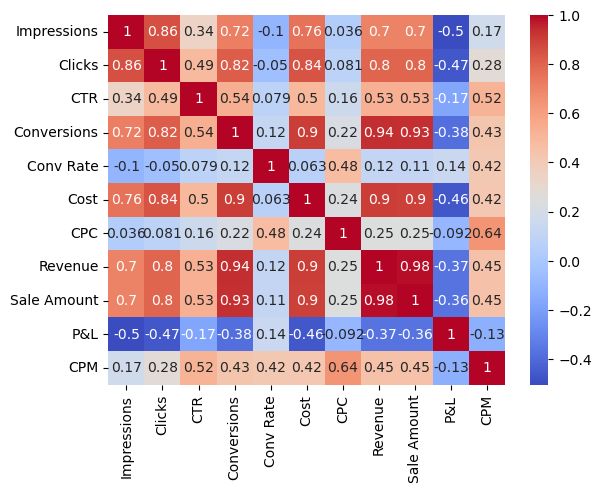

In [16]:
sns.heatmap(df.corr("kendall"), cmap="coolwarm", annot=True)